In [3]:
# Conexión


import pyodbc 
import pandas as pd

server = "SERGIOPC\SQLEXPRESS"          #Nombre del servidor
database = "NEPTUNO"                    #Nombre de la base de datos
connection = 'yes'                      #Conexión
conn_str = (
    f'DRIVER={{SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'TRUSTED_CONNECTION={connection};'
)

try:
    conn = pyodbc.connect(conn_str)
    print("*** Conectado con éxito! ***")
    
except Exception as e:
    print("Fallo de conexión! ", e)




<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
C:\Users\sergi\AppData\Local\Temp\ipykernel_14896\461942928.py:7: SyntaxWarning: invalid escape sequence '\S'
  server = "SERGIOPC\SQLEXPRESS"          #Nombre del servidor


*** Conectado con éxito! ***


In [4]:
#Solo una variable, como cortar una cadena alfanumerica, si es muy larga
#En vez de " en los extermos le pondre """, LOS ALIAS DE CAMPOS SOLO LOS RECONOCE EN EL SUJETO
sql_pedidos = """SELECT P.PaísDestinatario AS Pais, SUM(DP.Cantidad*DP.PrecioUnidad) AS Importe
FROM Pedidos P, [Detalles de pedidos] DP WHERE P.IdPedido = DP.IdPedido GROUP BY
P.PaísDestinatario"""
#Todo lo que no sea metrica en el sujeto debe ir en el group by porque sera dimension
try:  
    pedidos = pd.read_sql(sql_pedidos, conn)
    #Solo ver los n paises que mas importe tienen, nlargest para los de + importe
    #nsmallest, numero de elementos a visualizar y el campo de filtrado Importe
    pedidos = pedidos.nlargest(6,'Importe')
   
    print(pedidos)
 
except Exception as e:
    print("El error es",e)
 

              Pais    Importe
13  Estados Unidos  263726.98
7         Alemania  244640.63
11         Austria  139496.63
10          Brasil  114968.48
1          Francia   85058.76
19       Venezuela   60814.89


C:\Users\sergi\AppData\Local\Temp\ipykernel_14896\181815001.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pedidos = pd.read_sql(sql_pedidos, conn)


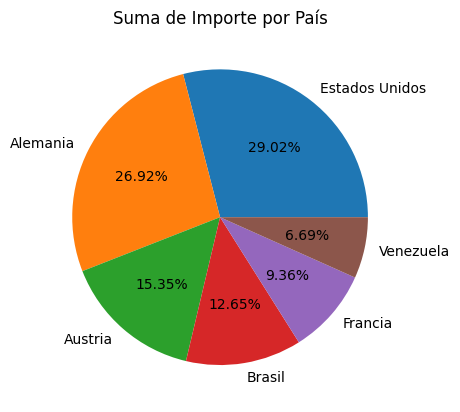

In [5]:
#El grafico circular, importar la clase pyplot de la libreria de matplotlib
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt2
#Primero tengo que crear una figura, reserva espacio en el kernel, creo una figura
#de nombre grafico
fig, grafico = plt.subplots()
#El grafico circular es tipo pie, primero la metrica (Importe Neto), segundo la dimension
#CiudadDestinario, queremos ver el % que representa cada ciudad con el parametro autopct
#"%.2f%%"
grafico.pie(pedidos['Importe'],labels=pedidos['Pais'],
            autopct="%.2f%%")
#Poner un titulo en el grafico
grafico.set_title("Suma de Importe por País")
plt.show()
 

Proxima clase:
Numpy paratrabajar con matrices
Scikit-learn para crear modelos predictivos

             Pais    Importe
0  Estados Unidos  263726.98
1        Alemania  244640.63
2         Austria  139496.63
3          Brasil  114968.48
4         Francia   85058.76
5       Venezuela   60814.89
6    Resto paises  445752.22


C:\Users\sergi\AppData\Local\Temp\ipykernel_14896\312589351.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pedidos = pd.read_sql(sql_pedidos, conn)


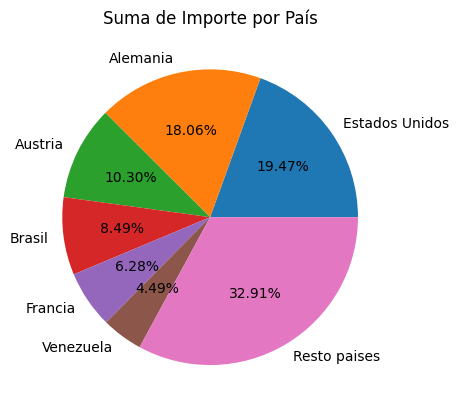

In [ ]:
#Solo una variable, como cortar una cadena alfanumerica, si es muy larga
#En vez de " en los extermos le pondre """, LOS ALIAS DE CAMPOS SOLO LOS RECONOCE EN EL SUJETO
sql_pedidos = """SELECT P.PaísDestinatario AS Pais, SUM(DP.Cantidad*DP.PrecioUnidad) AS Importe
FROM Pedidos P, [Detalles de pedidos] DP WHERE P.IdPedido = DP.IdPedido GROUP BY
P.PaísDestinatario"""
#Todo lo que no sea metrica en el sujeto debe ir en el group by porque sera dimension
try:  
    pedidos = pd.read_sql(sql_pedidos, conn)
    #Solo ver los n paises que mas importe tienen, nlargest para los de + importe
    #nsmallest, numero de elementos a visualizar y el campo de filtrado Importe
    pedidos1 = pedidos.nlargest(6,'Importe')
    pedidos2 = pedidos.nsmallest(len(pedidos)-6, 'Importe')
    importe2 = pedidos2['Importe'].sum()
    df = pd.DataFrame([{'Pais':'Resto paises','Importe':importe2}])
    resultado = pd.concat([pedidos1,df],ignore_index=True)
    print(resultado)
   
    #print(pedidos)
 
except Exception as e:
    print("El error es",e)
 

 #El grafico circular, importar la clase pyplot de la libreria de matplotlib

#from matplotlib import pyplot as plt2
#Primero tengo que crear una figura, reserva espacio en el kernel, creo una figura
#de nombre grafico
fig, grafico = plt.subplots()
#El grafico circular es tipo pie, primero la metrica (Importe Neto), segundo la dimension
#CiudadDestinario, queremos ver el % que representa cada ciudad con el parametro autopct
#"%.2f%%"
grafico.pie(resultado['Importe'],labels=resultado['Pais'],
            autopct="%.2f%%")
#Poner un titulo en el grafico
grafico.set_title("Suma de Importe por País")
plt.show()
 

In [ ]:
# Las matrices con numpy (viene instalado al instalar pandas o matplotlib)
# !pip install numpy

In [23]:
import numpy as np
a = np.array([3.25, 7.19, 8.66, 7.36])
#Para ver el número de filas y columnas de la matriz
print("Numero de elementos:", a.shape)

#Para ver el número de dimensiones:
print("Número de dimensiones:", a.ndim)

b = np.array([[3.25, 7.19, 8.66, 7.36],
            [9.17, 6.24, 7.27, 5.12],
            [4.67, 3.15, 4.62, 8.53]])

print("Numero de elementos:", b.shape)
print("Número de dimensiones:", b.ndim)

#numero total de elementos de la matriz
print("Número de elementos de la matriz:", b.size)

#Con len veremos la cantidad de filas
print("Número de filas:", len(b))

# toda la matriz
print(b)

#Como acceder a un elemento concreto de una matriz? fila / columna
print(b[1,2])

Numero de elementos: (4,)
Número de dimensiones: 1
Numero de elementos: (3, 4)
Número de dimensiones: 2
Número de elementos de la matriz: 12
Número de filas: 3
[[3.25 7.19 8.66 7.36]
 [9.17 6.24 7.27 5.12]
 [4.67 3.15 4.62 8.53]]
7.27


In [ ]:
print(b[2,3])
# Para ver una fila entera: fila 2 y todas sus columnas
b[2,:]

# Para ver la columna entera
b[:,1]


#Filas por columnas:
b.transpose()



8.53


array([[3.25, 9.17, 4.67],
       [7.19, 6.24, 3.15],
       [8.66, 7.27, 4.62],
       [7.36, 5.12, 8.53]])

In [35]:
# Operaciones con matrices numéricas
print("El valor más pequeño de toda la matriz es: ",b.min())
print("El valor más grande de toda la matriz es: ",b.max())
print("El valor de la suma de toda la matriz es: ",b.sum())
print("El valor promedio de toda la matriz es: ",round(b.mean(),2))

El valor más pequeño de toda la matriz es:  3.15
El valor más grande de toda la matriz es:  9.17
El valor de la suma de toda la matriz es:  75.23
El valor promedio de toda la matriz es:  6.27


In [40]:
print("El valor más pequeño de cada columna es:",b.min(0))
print("El valor más pequeño de cada fila es:",b.min(1))

El valor más pequeño de cada columna es: [3.25 3.15 4.62 5.12]
El valor más pequeño de cada fila es: [3.25 5.12 3.15]


In [ ]:
# Machine learning: Creación de un modelo predictivo 
# En machine learning, el modelo predictivo está basado en una regresión lineal
# Una refresión lineal es la relación entre 2 variables cuantitativas consecutivas
# 1 maq = 100 piezas 
# 2 maquinas = 200 piezas 
# 3 maquinas = 300 piezas 
#Como veo representada esta relación? Con un gráfico de dispersión.

# Como calculo una predicción?
# 4 elementos: 
# y = variable a predecir, variable dependiente. 
# x = variable independiente
# a: la pendiente de la recta 
# b: la intersección 
    #   función: y = ax + b

# el valor R2 sería 1: no hay dispersión, es una línea que pasa por encima de todos los puntos.
# y=100x

In [ ]:
# 1 maq = 100 piezas 
# 2 maquinas = 140 piezas 
# 3 maquinas = 300 piezas 

# el valor R2 sería 0,89
# y=100x - 20

# El coeficiente r2 marca el porcentaje de posible acierto en la predicción
# Normalmente, los modelos predictivos son fiables a partir del 95%

# Cuantos menos datos, menos fiables.

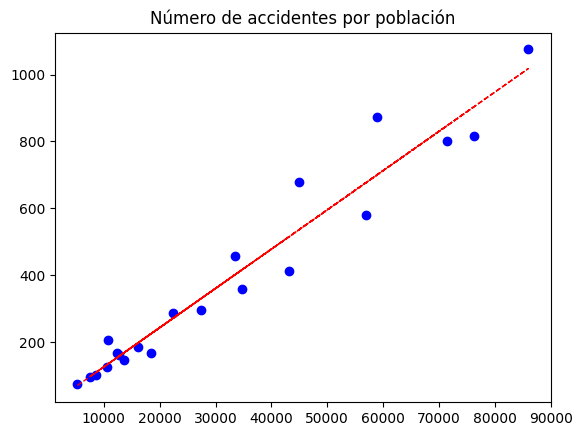

Coeficiente de la pendiente (a): [0.01174636]
Coeficiente de la intersección (b): 7.6534
El coeficiente r2 es 0.9455
La predicción para una población de [114000] habitantes es de 1346 accidentes.


C:\Users\sergi\AppData\Local\Temp\ipykernel_14896\2072024753.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("La predicción para una población de", población_ficticia, "habitantes es de", int(prediccion), "accidentes.")


In [91]:
#Cargamos el fichero en un df de pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

habitantes = pd.read_csv(r".\BBDD\Datos Accidentes localidad.csv")
# habitantes
#Queremos ver unicamente los habitantes
habitantes['Habitantes']
habitantes['Num. Accidentes']
#dibujar el grafico de dispersión
# asignaremos a la variable dependiente y el numero de habitantes
y = habitantes['Num. Accidentes']
#Asignaremos a la variable independiente x el número de habitantes
x = habitantes['Habitantes']
#Creamos el gráfico: scatter es el grafico de dispersión.
plt.scatter(x, y, color = "blue") #Lo hemos hecho directo. Sólo se puede hacer 1 así. Si queremos hacer más de uno, se debe utilizar fig.
plt.title("Número de accidentes por población")

#Ahora debemos dibujar la línea de tendencia con Numpy
#Trabajaremos con un método que se llama polyfit. 
# Este método ajusta los datos dentro de una función polinomial, es decir, cuadra por mínimos.
#Trabajaremos con una clase llamado poly1d, clase polinomial unidimensional: encapsular operaciones "naturales" en polinomios.

z = np.polyfit(x, y, 1) #una dimensión
h = np.poly1d(z)(x)
plt.plot(x, h, "r--", lw=1)
plt.show()

#para hacer la predicción tengo que instalar una librería: scikit-learn (librería para hacer machine learning)
#una vez instalada, vamos a averiguar el coeficiente de la pendiente (a) (sabemos que es = 0,0117)
# también vamos a averiguar el coeficiente de la pendiente (b) (Sabemos que es = 7,6534)
# por último, averiguaremos el coeficiente r2 (Sabemos que es 0,9455)
modeloPredictivoLineal = LinearRegression() #Estamos creando mi modelo predictivo: modeloPredictivoLineal
#Los modelos predictivos, antes de hacer una predicción se les tiene que enrenar con fit 
modeloPredictivoLineal.fit(x.values.reshape(-1, 1), y) #con el reshape, inicializamos la matriz, inicializando a -1 y +1
                                                    # iniciar un modelo a 0 con una matriz 2d. El -1 permite a Python 
                                                    # calcular el número de filas según el tamaño de datos.
#Averiguar el coeficiente de la pendiente a:
a = modeloPredictivoLineal.coef_
print("Coeficiente de la pendiente (a):",a)
#Averiguar el coeficiente de la intersección (b):
b = modeloPredictivoLineal.intercept_
print("Coeficiente de la intersección (b):", round(b,4))
#Averiguar el coeficiente de calidad R2
r2 = modeloPredictivoLineal.score(x.values.reshape(-1, 1), y)
print("El coeficiente r2 es", round(r2,4))
#Finalmente, hacemos el cálculo de la predicción: Por ejemplo, para 114.000 habitantes, sabemos que es 1341 accidentes.
población_ficticia = np.array([114000]) 
prediccion = modeloPredictivoLineal.predict(población_ficticia.reshape(-1,1))
print("La predicción para una población de", población_ficticia, "habitantes es de", int(prediccion), "accidentes.")


In [ ]:
# !pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------------- ------------------------- 3.9/11.1 MB 21.3 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 21.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   ----- ---------------------------------- 5.2/40.9 MB 24.5 MB/s eta 0:00:02
   ---------- ----------------------------- 10.5/40.9 MB 25.1 MB/s eta 0:00:02
   -------------- ------------------------- 14.4/40.9 MB 23.2 MB/s eta 0:00:02
   ----------------- ---------------------- 18.4/40.9 MB 22.2 MB/s eta 0:00:02
   ---------------------- ----------------- 22.8/40.9 MB 21.8 MB/s eta 0:00:01
   -------------------------- ------------- 27.0/40.9 MB 21.7 MB/s eta 0:00:01
   ------------------------------ --------- 31.5/40.9 MB 21.7 MB/s eta 0:00:01
   ----------------------------------- ---- 36.4/40.9 MB 22.0 MB/s eta 0: